<a href="https://colab.research.google.com/github/humzakc9341/hello-world/blob/master/Humza_Chaudhry_FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from PIL import Image
import glob
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, MaxPooling2D ,LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random


In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=1e09b9cfd8c03dc4d794bf04702956563e5d5c3123e2897c6163bcdcfb564dfa
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

100% 570M/572M [00:04<00:00, 97.0MB/s]
100% 572M/572M [00:04<00:00, 124MB/s] 


In [ ]:
!unzip covid-cxr-image-dataset-research -d dataset

Archive:  covid-cxr-image-dataset-research.zip
  inflating: dataset/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: dataset/COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: dataset/COVID_IEEE/covid/1-s2.0-S1684118220300682

In [ ]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
COV_DIR = "dataset/COVID_IEEE/covid"
NORM_DIR = "dataset/COVID_IEEE/normal"
VIR_DIR = "dataset/COVID_IEEE/virus"

In [ ]:
Images_details(NORM_DIR)

 ====== Images in:  dataset/COVID_IEEE/normal
images_count:	668
min_width:	1040
max_width:	2628
min_height:	650
max_height:	2628


In [ ]:
Images_details(COV_DIR)

 ====== Images in:  dataset/COVID_IEEE/covid
images_count:	536
min_width:	240
max_width:	4095
min_height:	237
max_height:	4095


In [ ]:
Images_details(VIR_DIR)

 ====== Images in:  dataset/COVID_IEEE/virus
images_count:	619
min_width:	384
max_width:	2304
min_height:	127
max_height:	2304


In [ ]:
Cimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

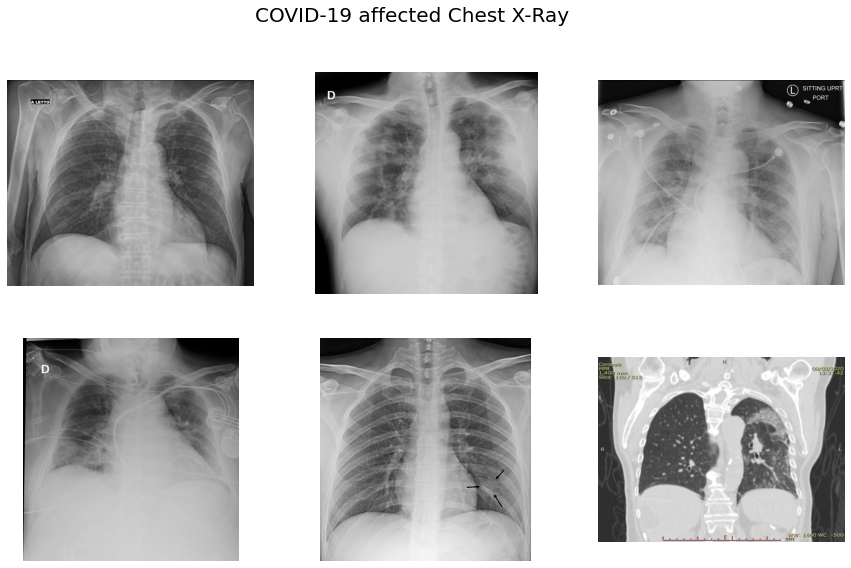

In [ ]:
sample_images = random.sample(Cimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('dataset/COVID_IEEE/covid/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('COVID-19 affected Chest X-Ray',fontsize=20)
plt.show()

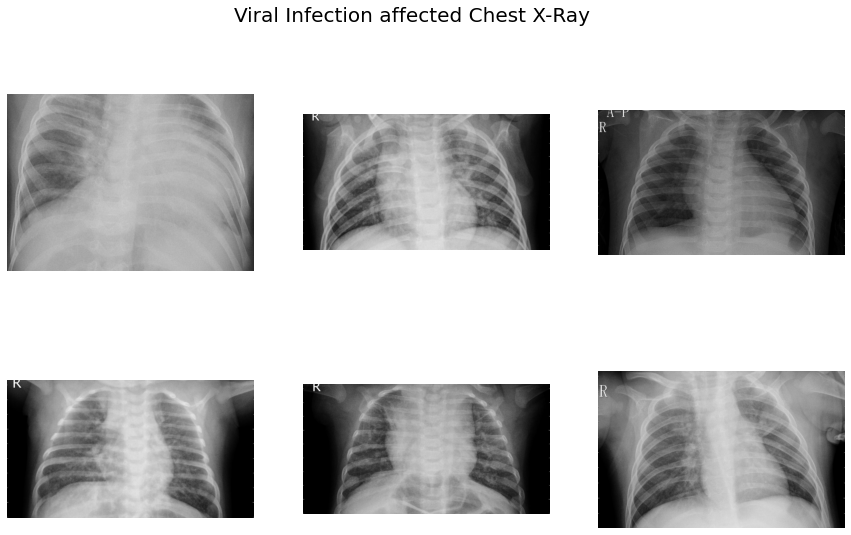

In [ ]:
sample_images = random.sample(Vimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('dataset/COVID_IEEE/virus/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Viral Infection affected Chest X-Ray',fontsize=20)
plt.show()

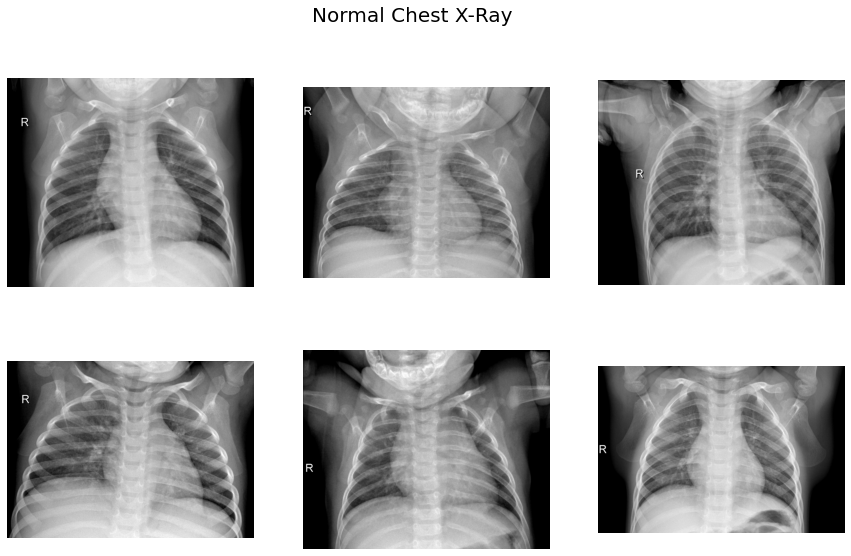

In [ ]:
sample_images = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('dataset/COVID_IEEE/normal/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Chest X-Ray',fontsize=20)
plt.show()

In [ ]:
## Enhancing the CXR Images using White balance and CLAHE

def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

## Data preparation

In [ ]:
data=[]
labels=[]
Uninfected=os.listdir("dataset/COVID_IEEE/normal/")
for a in Uninfected:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("dataset/COVID_IEEE/normal/"+a)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir("dataset/COVID_IEEE/covid/")
for b in Covid:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("dataset/COVID_IEEE/covid/"+b)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))
	data.append(image)
	labels.append(1)
 
Virus=os.listdir("dataset/COVID_IEEE/virus/")
for c in Virus:
	# extract the class label from the filename
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("dataset/COVID_IEEE/virus/"+c)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))


	data.append(image)
	labels.append(2)

## Image normalization

In [ ]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255
labels = np.array(labels)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels, test_size=0.20,  random_state=42)

In [ ]:
data=data.reshape(-1,224,224,1)

In [ ]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

## Model Building

In this kernel I will be using Depthwise separable CNNs

In [ ]:
experiment1=models.Sequential([
    # Convolution Step 1
    Conv2D(32, (3,3) , activation='relu', input_shape=(224,224,3)),
    # Max Pooling Step 1
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    # Convolution Step 2
    Conv2D(64,(3,3), activation ='relu'),
    # Max Pooling Step 2
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Convolution Step 3
    Conv2D(128,(3,3), activation ='relu'),
    # Convolution Step 4
    Conv2D(128,(3,3), activation ='relu'),
    # Convolution Step 5
    Conv2D(64,(3,3), activation ='relu'),
    # Max Pooling Step 3
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
    
])

In [ ]:
experiment1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 54, 54, 64)       

In [ ]:
experiment1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
experiment1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5)]

In [ ]:

history = experiment1.fit(
	trainAug.flow(trainX, trainY, batch_size=100),
	steps_per_epoch=len(trainX) // 100,
	validation_data=(testX, testY),
	validation_steps=len(testX) // 100,
	epochs=50,callbacks=callbacks)

Epoch 1/50
14/14 [==============================] - 254s 18s/step - loss: 1.9459 - accuracy: 0.3115 - val_loss: 1.8005 - val_accuracy: 0.3671
Epoch 2/50
14/14 [==============================] - 268s 19s/step - loss: 1.6200 - accuracy: 0.3270 - val_loss: 1.3791 - val_accuracy: 0.3671
Epoch 3/50
14/14 [==============================] - 259s 19s/step - loss: 1.4547 - accuracy: 0.3200 - val_loss: 1.2513 - val_accuracy: 0.3726
Epoch 4/50
14/14 [==============================] - 258s 18s/step - loss: 1.3048 - accuracy: 0.3652 - val_loss: 1.0765 - val_accuracy: 0.6575
Epoch 5/50
14/14 [==============================] - 253s 18s/step - loss: 1.1738 - accuracy: 0.4219 - val_loss: 1.0748 - val_accuracy: 0.6932
Epoch 6/50
14/14 [==============================] - 253s 18s/step - loss: 1.0216 - accuracy: 0.5206 - val_loss: 0.6500 - val_accuracy: 0.7808
Epoch 7/50
14/14 [==============================] - 257s 18s/step - loss: 0.7995 - accuracy: 0.6568 - val_loss: 0.5407 - val_accuracy: 0.8685
Epoch 

**Loss and Accuracy for the training and validation datasets**

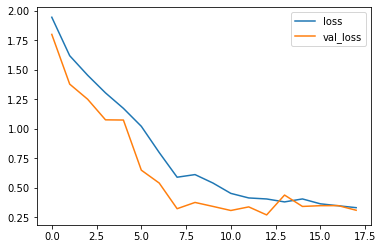

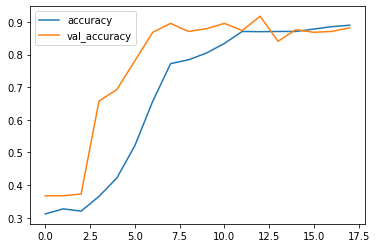

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

**Model Evaluation**

In [ ]:
predIdxs = experiment1.predict(testX, batch_size=50)
predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

              precision    recall  f1-score   support

      normal       0.92      0.81      0.86       134
       covid       0.87      0.96      0.91       107
       virus       0.86      0.90      0.88       124

    accuracy                           0.88       365
   macro avg       0.88      0.89      0.88       365
weighted avg       0.88      0.88      0.88       365



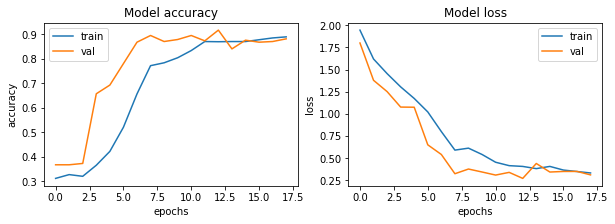

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig('train_val_acc_loss.png')

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('.mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

12/12 [==============================] - 15s 1s/step - loss: 0.2707 - accuracy: 0.9178
[0.27073952555656433, 0.9178082346916199]


**Confusion Matrix**

46/46 [==============================] - 16s 353ms/step


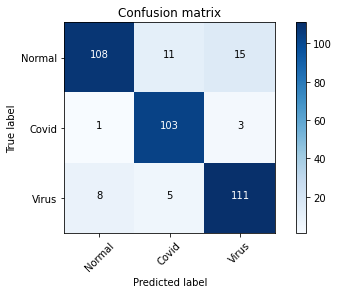

In [ ]:
import itertools
pred_Y = experiment1.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = experiment1.predict(testX, batch_size=50)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

**Test**

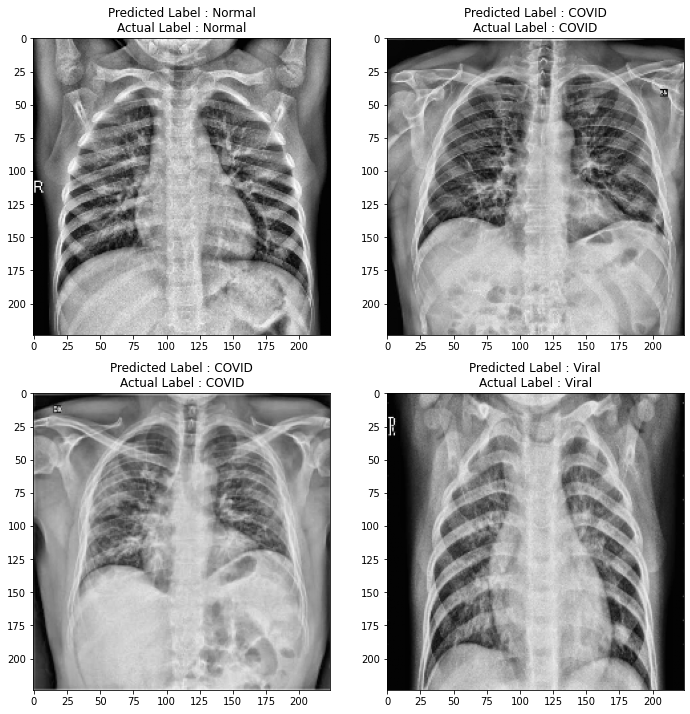

In [ ]:
pred=experiment1.predict(testX, batch_size=100)
predicted=np.argmax(pred,axis=1)
classes = {0 : 'Normal',
            1 : 'COVID',
            2 : 'Viral'}
incorrect = []
for i in range(len(testY)):
    if(not predicted[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 22):
        break

correct = []
for i in range(len(testY)):
    if(predicted[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 100):
        break
fig, ax = plt.subplots(2,2,figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[predicted[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[predicted[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[predicted[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[predicted[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[3]]]))

fig.tight_layout(pad=1.0)
plt.show()